In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#sys.path.append('C:\\Users\\elisa\\Documents\\git\\mplstereonet')
sys.path.append('../../..')
import mplstereonet
import gempy as gp
#from importlib import reload
import os
#sys.path.append('C:\\Users\\elisa\\Documents\\git\\remote-geomod')  # append local path to access rgeomod module
import pandas as pn

#import rgeomod

#import gdal
import skimage
import scipy
import linecache
from mpl_toolkits.mplot3d import Axes3D
from copy import copy

import seaborn as sns

../../../gempy/data_management.py:34: UserWarning: qgrid package is not installed. No interactive dataframes available.
  warnings.warn('qgrid package is not installed. No interactive dataframes available.')
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_jcvhahon.c:4:10: fatal error: cudnn.h: No such file or directory\n #include <cudnn.h>\n          ^~~~~~~~~\ncompilation terminated.\n'
Mapped name None to device cuda: GeForce RTX 2080 (0000:01:00.0)
../../../gempy/posterior_analysis.py:24: UserWarning: pymc (v2) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v2) package is not installed. No support for stochastic simulation posterior analysis.")
../../../gempy/posterior_analysis.py:28: UserWarning: pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v3) package is not installed. No support for stochastic simulatio

- Model 1: fault orientation uncertain 
- Model 2: fault location of fault_NWSE equally likely within 200m 
- Model 3a-d: formation orientation
- Model 4a-d: formation and fault orientation
- Model 5a-d: formation and fault orientation, fault location

| Model num | fault pos | fault orient | form orient | path_i | path_o | remark |
|-----------|-----------|--------------|-------------|--------|--------| |
| 1 |-|y|-| all_points  | Foliations_clust20_nl  |faultsonly|
|-----------|-----------|--------------|-------------|--------|--------||
| 2 |y|-|-|  ? |  all_foliations ||
|-----------|-----------|--------------|-------------|--------|--------||
| 3a|-|-|y|all_points|Foliations_clust20_nf|save|
| 3b|-|-|y|all_points|Foliations_clust21_nf|save|
| 3c|-|-|y|all_points|Foliations_clust22_nf|save|
|-----------|-----------|--------------|-------------|--------|--------||
| 4a|-|y|y|all_points|Foliations_clust20|save|
| 4b|-|y|y|all_points|Foliations_clust21|save|
| 4c|-|y|y|all_points|Foliations_clust22|save|
|-----------|-----------|--------------|-------------|--------|--------||
| 5a|y|y|y|?|Foliations_clust20|
| 5b|y|y|y|?|Foliations_clust21|
| 5c|y|y|y|?|Foliations_clust22|
|-----------|-----------|--------------|-------------|--------|--------||
| 6|-|-|-|all_points|Foliations_subj (based on clust21)|save|
|-----------|-----------|--------------|-------------|--------|--------||
| 7|-|-|-|all_points|Foliations_clust21_final (based on clust21)|save|

In [2]:
model_num, param = 7,'b'

In [3]:
if model_num == 1:
    path_interf = 'all_points.csv'
    path_orient = 'Foliations_clust20_nl.csv'
    print('faults only')

elif model_num == 6:
    path_interf = 'all_points.csv'
    path_orient = 'Foliations_subj.csv'
    
elif model_num == 7:
    path_interf = 'all_points.csv'
    path_orient = 'Foliations_clust21_final.csv'
    
    
elif model_num == 2:
    path_interf = None
    path_orient = 'all_foliations.csv'
    
elif model_num == 3:
    path_interf = 'all_points.csv'
    if param == 'a':
        path_orient = 'Foliations_clust20_nf.csv'
    elif param == 'b':
        path_orient = 'Foliations_clust21_nf.csv'
    elif param == 'c':
        path_orient = 'Foliations_clust22_nf.csv'
        
elif (model_num == 4) or (model_num == 5):
    if param == 'a':
        path_orient = 'Foliations_clust20.csv'
    elif param == 'b':
        path_orient = 'Foliations_clust21.csv'
    elif param == 'c':
        path_orient = 'Foliations_clust22.csv'
    
    if model_num == 4:
        path_interf = 'all_points.csv'
    if model_num == 5:
        path_interf = None

In [4]:
path_interf,path_orient

('all_points.csv', 'Foliations_clust21_final.csv')

In [5]:
path_interf='data/'+path_interf
path_orient='data/'+path_orient

In [6]:
resolution = [50,50,50]
extent = np.array([777000, 794500, 6345000, 6353000, -1500, 1000])

In [7]:
geo_data = gp.create_data(extent = extent, resolution = resolution,
                        path_i = path_interf,
                        path_o = path_orient)

In [8]:
geo_data.orientations[geo_data.orientations['kappa']==100000]

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,...,formation_number,order_series,isFault,Unnamed: 0,beta,index,kappa,n_points,annotations,formation_value
54,782104.797112,6.346980e+06,-956.278280,0.174316,0.004330,0.984680,10.042000,88.57700,1,Carboniferous,...,1,1,False,1,NaN,NaN,100000.0,NaN,"${\bf{x}}_{\beta \,{\bf{1}},54}$",1
55,789425.182358,6.347079e+06,-931.862731,0.173165,0.030303,0.984427,10.125000,80.07400,1,Carboniferous,...,1,1,False,2,NaN,NaN,100000.0,NaN,"${\bf{x}}_{\beta \,{\bf{1}},55}$",1
56,789414.652600,6.352236e+06,-222.875418,0.050213,-0.020698,0.998524,3.113347,112.40213,1,Carboniferous,...,1,1,False,3,NaN,NaN,100000.0,NaN,"${\bf{x}}_{\beta \,{\bf{1}},56}$",1
57,788287.576600,6.352700e+06,-262.283918,-0.080578,0.033215,0.996195,5.000000,292.40200,1,Carboniferous,...,1,1,False,4,NaN,NaN,100000.0,NaN,"${\bf{x}}_{\beta \,{\bf{1}},57}$",1
139,793813.876587,6.347090e+06,-630.084856,0.066134,-0.041138,0.996962,4.467000,121.88300,1,Liassic,...,2,1,False,5,NaN,NaN,100000.0,NaN,"${\bf{x}}_{\beta \,{\bf{2}},17}$",2
317,780291.429877,6.346096e+06,-14.621493,-0.026012,-0.038497,0.998920,2.663000,214.04600,1,Triassic,...,3,1,False,0,NaN,NaN,100000.0,NaN,"${\bf{x}}_{\beta \,{\bf{3}},92}$",3


In [9]:
#sorting of lithologies
gp.set_series(geo_data,{'fault_NWSE':('fault_NWSE'),
                        'fault_NS':('fault_NS'),
                        'fault_NESW1':('fault_NESW1'),
                        'fault_NESW2':('fault_NESW2'),
                        'fault_NESW3':('fault_NESW3'),
                        'Trias_Series':('Liassic','Triassic'), 
                        'Carbon_Series':('Carboniferous'), 
                        'Basement_Series':('basement')},
             order_formations=['fault_NWSE','fault_NS',
                                'fault_NESW1','fault_NESW3','fault_NESW2',
                               'Liassic','Triassic','Carboniferous','basement'])

In [10]:
colordict = {'Liassic':'#015482', 'Triassic': '#9f0052', 'Carboniferous':'#ffbe00','basement':'#728f02',
            'fault_NWSE':'#2a2a2a','fault_NS':'#2a2a2a','fault_NESW2':'#939393','fault_NESW1':'#939393',
             'fault_NESW3':'#939393','fault_NESW4':'#939393' }
geo_data.set_colors(colordict)

,value,formation_number,color
fault_NWSE,1,1,#2a2a2a
fault_NS,2,2,#2a2a2a
fault_NESW1,3,3,#939393
fault_NESW3,4,4,#939393
fault_NESW2,5,5,#939393
Liassic,6,6,#015482
Triassic,7,7,#9f0052
Carboniferous,8,8,#ffbe00
basement,9,9,#728f02


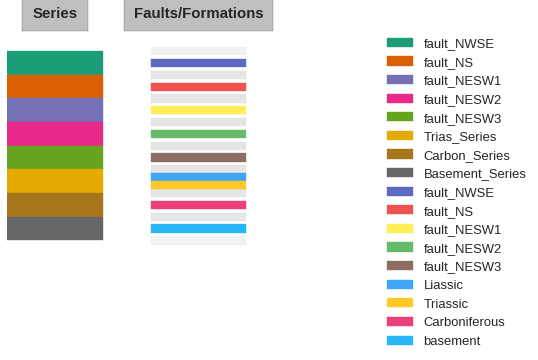

In [11]:
gp.get_sequential_pile(geo_data)

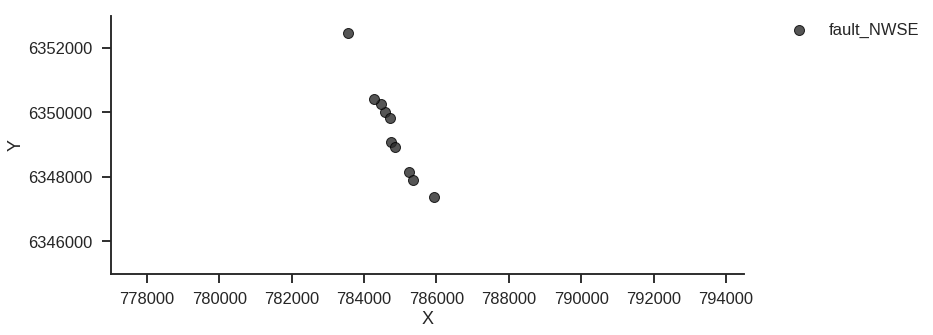

In [12]:
gp.plotting.plot_data(geo_data,direction='z',data_type='interfaces',series='fault_NWSE')
#plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\clusteredorient_only.png", format='png', dpi=1000)

In [13]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True,
                                  dtype='float32',theano_optimizer='fast_run')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_run
Device:  cuda
Precision:  float32
Number of faults:  5


### Choosing which series a fault offsets

In [14]:
faults1=['fault_NESW1',
 'fault_NESW2',
 'fault_NESW3']
faults2=['fault_NS',
 'fault_NWSE']

In [15]:
geo_data.faults_relations.loc[faults1,['Trias_Series']] = True
geo_data.faults_relations.loc[faults2,['Trias_Series']] = True
geo_data.faults_relations.loc[faults2,['Carbon_Series']] = True
geo_data.faults_relations

,fault_NWSE,fault_NS,fault_NESW1,fault_NESW2,fault_NESW3,Trias_Series,Carbon_Series,Basement_Series
fault_NWSE,False,False,False,False,False,True,True,False
fault_NS,False,False,False,False,False,True,True,False
fault_NESW1,False,False,False,False,False,True,False,False
fault_NESW2,False,False,False,False,False,True,False,False
fault_NESW3,False,False,False,False,False,True,False,False
Trias_Series,False,False,False,False,False,False,False,False
Carbon_Series,False,False,False,False,False,False,False,False
Basement_Series,False,False,False,False,False,False,False,False


In [16]:
interp_data.update_interpolator(geo_data)

CPU 1 core = 2,63

GPU = ,12

In [17]:
lith_block, fault_block = gp.compute_model(interp_data)

In [18]:
#np.save( 'lith_block_clust22',lith_block[0])

## Adding topography

In [19]:
topo_plotting = np.load('topo_plotting.npy')

In [20]:
from gempy.utils import topography
elevation = topography.DEM(xyzarray=topo_plotting, geodata=geo_data)#,output_path = folder,interpdata=interp_data)

Define path to raster file


../../../gempy/utils/topography.py:24: UserWarning: gdal package is not installed. No support for raster functions
  warnings.warn("gdal package is not installed. No support for raster functions")


### Creating figures

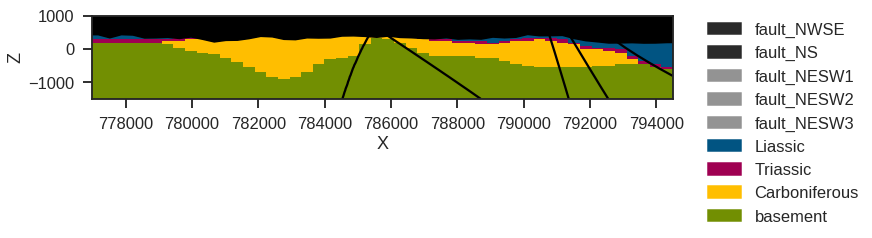

In [20]:
n, direc = 18, 'y'
gp.plot_section(geo_data, lith_block[0], cell_number=n,  direction=direc, plot_data=False, topography=elevation)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=n,  direction=direc)
plt.savefig('/home/elisa/elisa/section_'+str(n)+direc+'_model'+str(model_num)+param)

/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


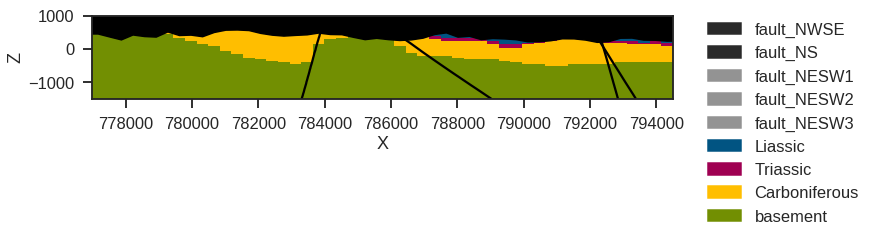

In [21]:
n, direc = 40, 'y'
gp.plot_section(geo_data, lith_block[0], cell_number=n,  direction=direc, plot_data=False, topography=elevation)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=n,  direction=direc)
plt.savefig('/home/elisa/elisa/section_'+str(n)+direc+'_model'+str(model_num)+param)

/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


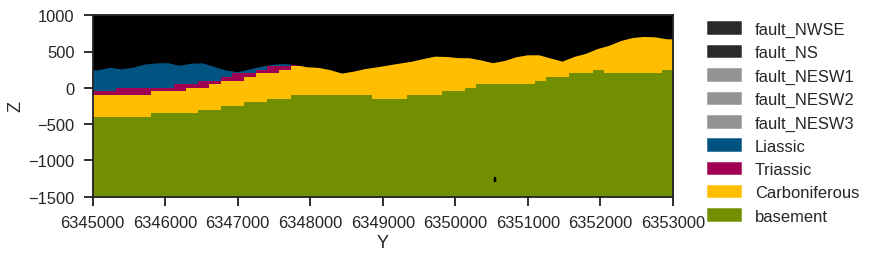

In [22]:
n, direc = 9, 'x'
gp.plot_section(geo_data, lith_block[0], cell_number=n,  direction=direc, plot_data=False, topography=elevation)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=n,  direction=direc)
plt.savefig('/home/elisa/elisa/section_'+str(n)+direc+'_model'+str(model_num)+param)

/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


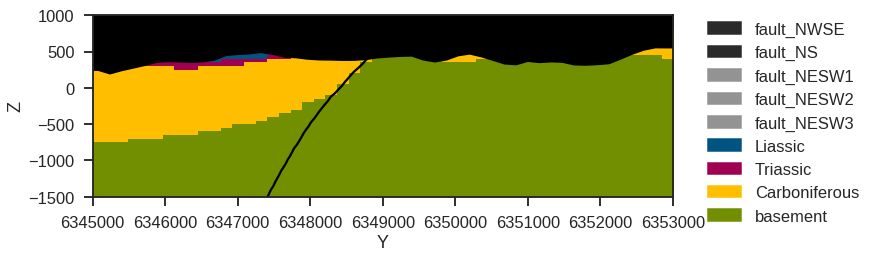

In [23]:
n, direc = 22, 'x'
gp.plot_section(geo_data, lith_block[0], cell_number=n,  direction=direc, plot_data=False, topography=elevation)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=n,  direction=direc)
plt.savefig('/home/elisa/elisa/section_'+str(n)+direc+'_model'+str(model_num)+param)

/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


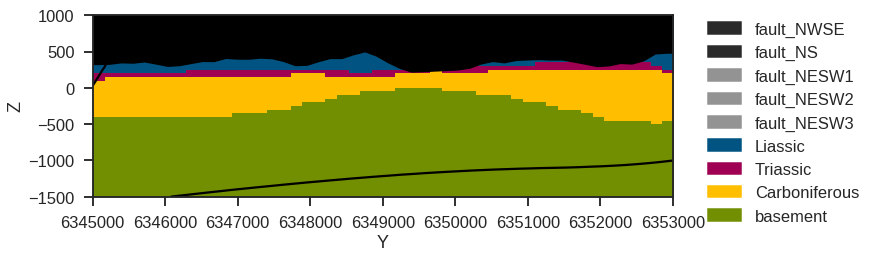

In [24]:
n, direc = 32, 'x'
gp.plot_section(geo_data, lith_block[0], cell_number=n,  direction=direc, plot_data=False, topography=elevation)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=n,  direction=direc)
plt.savefig('/home/elisa/elisa/section_'+str(n)+direc+'_model'+str(model_num)+param)

/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


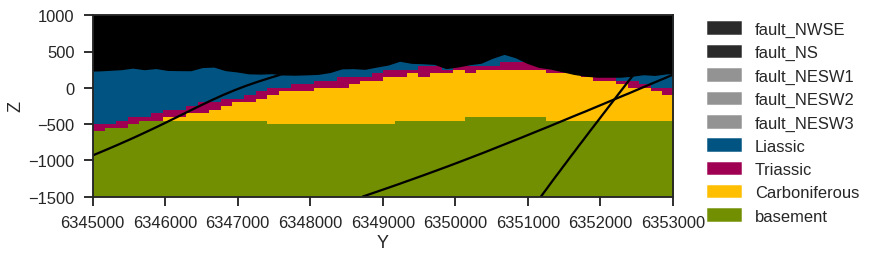

In [25]:
n, direc = 44, 'x'
gp.plot_section(geo_data, lith_block[0], cell_number=n,  direction=direc, plot_data=False, topography=elevation)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=n,  direction=direc)
plt.savefig('/home/elisa/elisa/section_'+str(n)+direc+'_model'+str(model_num)+param)

#### GeologicalMap

In [21]:
# We stack the topograghy and the regular grid values
topo_data = np.load('surface_coordinates.npy')
x_to_int = np.vstack((topo_data, geo_data.grid.values))

In [22]:
lith_complete, _ = gp.compute_model_at(x_to_int, interp_data)
lith_map = lith_complete[0][:320*700]
lith_mesh = lith_complete[0][320*700:]

##### Plot section of the mesh

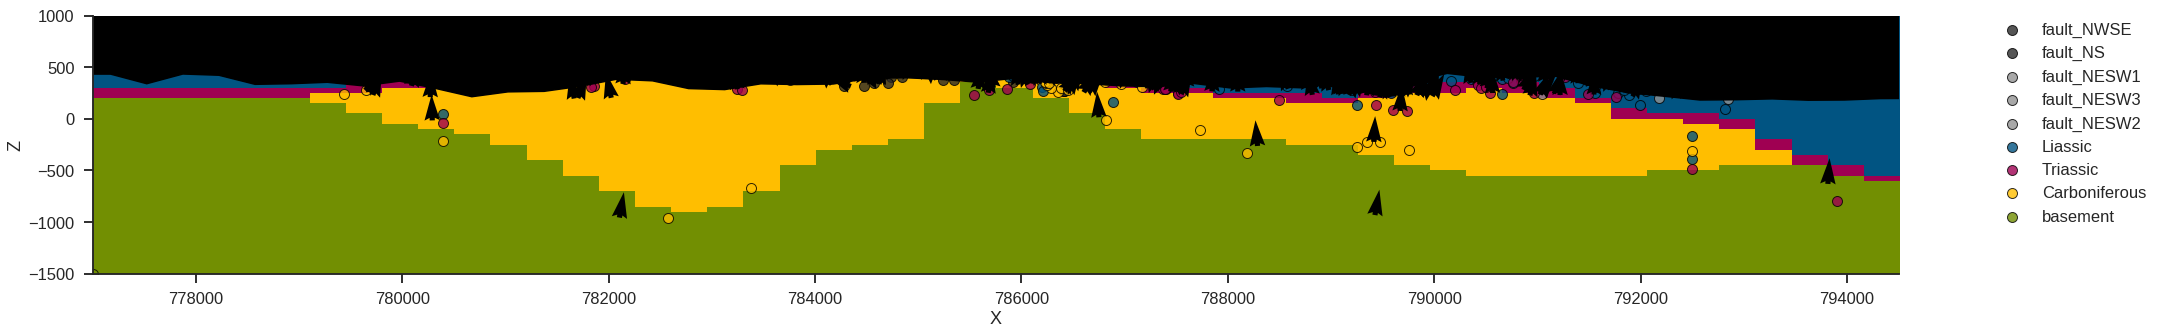

In [23]:
gp.plot_section(geo_data, lith_mesh, 18, plot_data=True, topography=elevation)

In [24]:
#np.save('map_clust22',lith_map)

##### Plot geological map

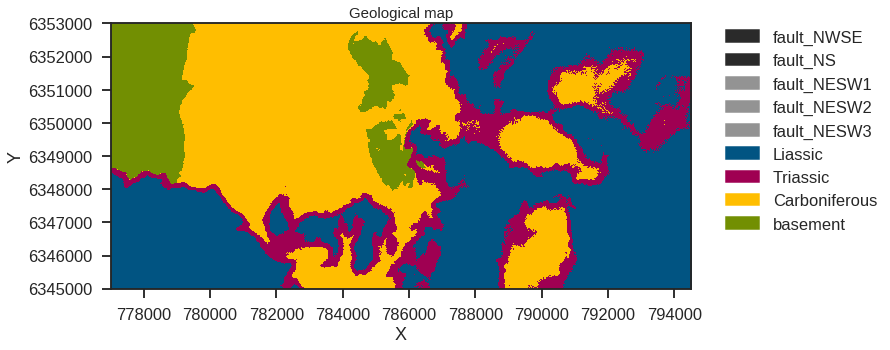

In [25]:
gp.plotting.plot_map(geo_data, geomap=np.flip(lith_map.reshape(320,700),axis=0))
#plt.savefig('/home/elisa/elisa/map_'+str(model_num)+param)

### Creating vMF distributions for each orientation

In [26]:
import gempy.utils.fishdist as fish

for some purposes spherecluster package would be good (or I copy the respective file?!


In [27]:
def create_vMF_list(orientdf, datatype = 'all'):
    vMF_list=[]
    if datatype == 'faultsonly':
        df = orientdf[orientdf['isFault']==True]
    elif datatype == 'lithonly':
        df = orientdf[orientdf['isFault']==False]
    elif datatype == 'all':
        df = orientdf
    else:
        print('bist du behindert?')
    for e, i in df[['G_x', 'G_y', 'G_z', 'kappa']].iterrows():
        vMF_list.append(fish.vMF('vMF_' + str(e), mean=i[['G_x', 'G_y', 'G_z']].values, kappa=i['kappa']))
    return vMF_list

In [28]:
# Initial data
select_i = geo_data.interfaces['formation'] == 'fault_NWSE'
x_i = geo_data.interfaces[select_i]['X']
y_i = geo_data.interfaces[select_i]['Y']

select_o = geo_data.orientations['formation'] == 'fault_NWSE'
x_o = geo_data.orientations[select_o]['X']
y_o = geo_data.orientations[select_o]['Y']
angle = 45

In [29]:
import copy

In [30]:
geo_data_virgin=copy.deepcopy(geo_data)

In [31]:
geo_data_virgin

In [32]:
def calculate_models(n_iter, geo_data, interp_data, x_to_int,datatype='all',faultpos=True,orient=True):
    
    interp_data.update_interpolator(geo_data_virgin) #make it virgin again       
        
    # initialize counters
    lith_complete, _ = gp.compute_model_at(x_to_int, interp_data)
    lith_map = lith_complete[0][:320*700]
    lith_mesh = lith_complete[0][320*700:]
    ### get number of different lithologies
    lith_id = np.unique(np.round(lith_mesh).astype(int))
    ### round blocks
    block_map  = np.round(lith_map).astype(int)
    block_mesh  = np.round(lith_mesh).astype(int)
    ### create one array for every lithology to count frequency
    count_map = np.zeros((len(lith_id), block_map.shape[0]))
    count_mesh = np.zeros((len(lith_id), block_mesh.shape[0]))
    
    vMF_list=create_vMF_list(geo_data.orientations,datatype=datatype)
    
    for a in range(0,n_iter):          
        ### modify fault position in geodata
        if faultpos==True:
            for i in range(5):
                distance = np.random.uniform(0, 500)
                # Changing the dataframes:

                geo_data.interfaces.loc[select_i,'X'] = x_i.apply(lambda x: x + distance * np.cos(angle * np.pi / 180))
                geo_data.interfaces.loc[select_i,'Y']  = y_i.apply(lambda x: x + distance * np.sin(angle * np.pi / 180))

                geo_data.orientations.loc[select_o,'X'] = x_o.apply(lambda x: x + distance * np.cos(angle * np.pi / 180))
                geo_data.orientations.loc[select_o,'Y'] = y_o.apply(lambda x: x + distance * np.sin(angle * np.pi / 180))            

            interp_data.update_interpolator(geo_data)   
            
        if orient==True:
            new_orientations = np.vstack(list(map(lambda x: x.sample(num_samples=1, direct_output=True)[0], vMF_list)))
            # Modifing the rescale dataframe
            #print(len(new_orientations))
            if datatype == 'faultsonly':
                #print(len(new_orientations))
                cond = interp_data.geo_data_res.orientations['isFault']==True
            elif datatype == 'lithonly': 
                cond = interp_data.geo_data_res.orientations['isFault']==False                                       
            elif datatype == 'all': 
                cond=interp_data.geo_data_res.orientations.index
                #interp_data.geo_data_res.orientations[['G_x', 'G_y', 'G_z']] = new_orientations
            else:
                print('nein.')
                break
            interp_data.geo_data_res.orientations.loc[cond, ['G_x', 'G_y', 'G_z']] = new_orientations

            #print(interp_data.geo_data_res.orientations[interp_data.geo_data_res.orientations['isFault']==True][['G_x', 'G_y', 'G_z']])
            interp_data.geo_data_res.calculate_orientations()
        
        #compute model
        lith_complete, _ = gp.compute_model_at(x_to_int, interp_data)
        lith_map = lith_complete[0][:320*700]
        lith_mesh = lith_complete[0][320*700:]

        # update probability fields
        block_map  = np.round(lith_map).astype(int)
        block_mesh  = np.round(lith_mesh).astype(int)
        #print(block_mesh.shape)
        for i, l_id in enumerate(lith_id): #enumerate through all liths
            count_map[i][block_map == l_id] += 1 #sum up frequency
            count_mesh[i][block_mesh == l_id] += 1 

    prob_map = count_map/n_iter
    prob_mesh = count_mesh/n_iter
    print('done')
    return prob_map, prob_mesh

In [33]:
i = 10000

In [34]:
map_A,mesh_A = calculate_models(i,geo_data, interp_data, x_to_int,datatype='faultsonly',faultpos=True,orient=False)
map_C,mesh_C = calculate_models(i,geo_data, interp_data, x_to_int,datatype='faultsonly',faultpos=True,orient=True)

done
done


In [35]:
np.save('/home/elisa/elisa/results/map_A_'+str(model_num)+'_n'+str(), map_A)
np.save('/home/elisa/elisa/results/mesh_A_'+str(model_num)+'_n'+str(),mesh_A)
np.save('/home/elisa/elisa/results/map_C_'+str(model_num)+'_n'+str(), map_C)
np.save('/home/elisa/elisa/results/mesh_C_'+str(model_num)+'_n'+str(),mesh_C)

In [36]:
map_1,mesh_1 = calculate_models(i,geo_data, interp_data, x_to_int,datatype='lithonly',faultpos=False,orient=True)
map_1A,mesh_1A = calculate_models(i,geo_data, interp_data, x_to_int,datatype='lithonly',faultpos=True,orient=True)

done
done


In [37]:
np.save('/home/elisa/elisa/results/map_1_'+str(model_num)+'_n'+str(), map_1)
np.save('/home/elisa/elisa/results/mesh_1_'+str(model_num)+'_n'+str(),mesh_1)
np.save('/home/elisa/elisa/results/map_1A_'+str(model_num)+'_n'+str(), map_1A)
np.save('/home/elisa/elisa/results/mesh_1A_'+str(model_num)+'_n'+str(),mesh_1A)

In [38]:
map_1B,mesh_1B = calculate_models(i,geo_data, interp_data, x_to_int,datatype='all',faultpos=False,orient=True)
map_1C,mesh_1C = calculate_models(i,geo_data, interp_data, x_to_int,datatype='all',faultpos=True,orient=True)

done
done


In [39]:
np.save('/home/elisa/elisa/results/map_1B_'+str(model_num)+'_n'+str(), map_1B)
np.save('/home/elisa/elisa/results/mesh_1B_'+str(model_num)+'_n'+str(),mesh_1B)
np.save('/home/elisa/elisa/results/map_1C_'+str(model_num)+'_n'+str(), map_1C)
np.save('/home/elisa/elisa/results/mesh_1C_'+str(model_num)+'_n'+str(),mesh_1C)

In [111]:
#map_2A,mesh_2A = calculate_models(i,geo_data, interp_data, x_to_int,datatype='lithonly',faultpos=True,orient=True)
#map_2C,mesh_2C = calculate_models(i,geo_data, interp_data, x_to_int,datatype='all',faultpos=True,orient=True)

In [112]:
#faultsmap,faultsmesh = calculate_models(i,geo_data, interp_data, x_to_int,datatype='faultsonly')
#lithmap, lithmesh = calculate_models(i,geo_data, interp_data, x_to_int,datatype='lithonly')
#allmap, allmesh = calculate_models(i, geo_data,interp_data, x_to_int,datatype='all')

### Results

In [40]:
def calculate_ie_masked(prob):
    ie = np.zeros_like(prob[0])
    for l in prob:
        pm = np.ma.masked_equal(l, 0)  # mask where prob is 0
        ie -= (pm * np.ma.log2(pm)).filled(0)
    return ie

In [41]:
def calculate_ie_total(ie, absolute=False):
    if absolute:
        return np.sum(ie)
    else:
        return np.sum(ie) / np.size(ie)

In [42]:
map_A_ie=calculate_ie_masked(map_A)
mesh_A_ie=calculate_ie_masked(mesh_A)

map_C_ie=calculate_ie_masked(map_C)
mesh_C_ie=calculate_ie_masked(mesh_C)

map_1_ie=calculate_ie_masked(map_1)
mesh_1_ie=calculate_ie_masked(mesh_1)

map_1A_ie=calculate_ie_masked(map_1A)
mesh_1A_ie=calculate_ie_masked(mesh_1A)

map_1B_ie=calculate_ie_masked(map_1B)
mesh_1B_ie=calculate_ie_masked(mesh_1B)

map_1C_ie=calculate_ie_masked(map_1C)
mesh_1C_ie=calculate_ie_masked(mesh_1C)

In [43]:
from mpl_toolkits import axes_grid1

In [44]:
extent = np.array([777000, 794500, 6345000, 6353000, -1500, 1000])
def plot_block(block, cmap='viridis', direction = 'y', cell_number=18):
    block = block.reshape(50,50,50)
    if direction=='y':
        im = plt.imshow(block[:,cell_number,:].T, origin='lower', extent=extent[[0,1,4,5]],cmap=cmap)
    elif direction =='x':
        im = plt.imshow(block[:,:,cell_number].T, origin='lower', extent=extent[[2,3,4,5]],cmap=cmap)
    _add_colorbar(im)

    
def plot_map(geomap,cmap='viridis'):
    im = plt.imshow(geomap.reshape(320,700),cmap=cmap, extent=extent[[0,1,2,3]])
    _add_colorbar(im)

def _add_colorbar(im, aspect=20, pad_fraction=1, **kwargs):
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=2. / aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    plt.clim(0,2)
    return im.axes.figure.colorbar(im, cax=cax,**kwargs)

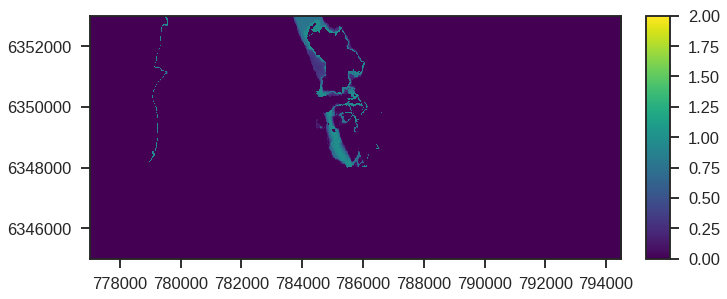

In [45]:
plot_map(map_A_ie)

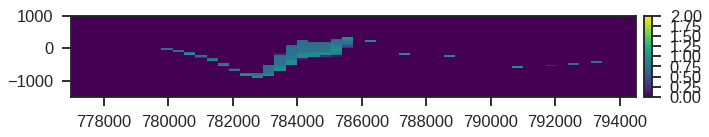

In [46]:
plot_block(mesh_A_ie)

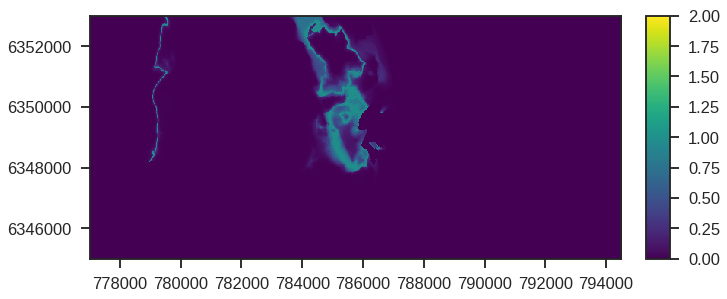

In [47]:
plot_map(map_C_ie)

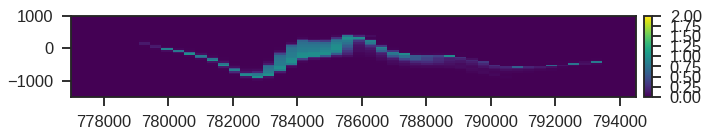

In [48]:
plot_block(mesh_C_ie)

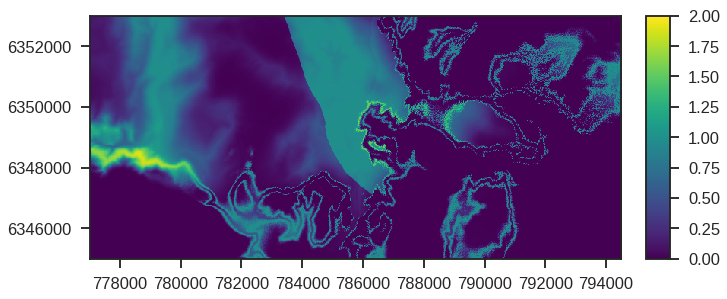

In [49]:
plot_map(map_1_ie)

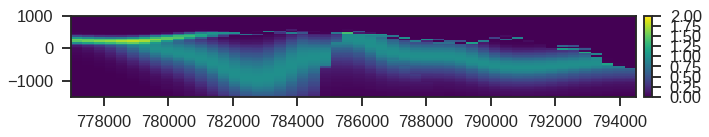

In [50]:
plot_block(mesh_1_ie)

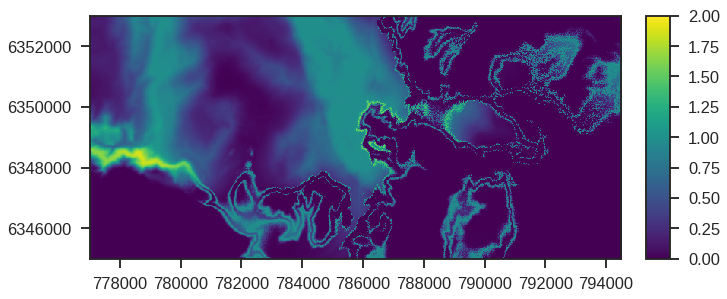

In [51]:
plot_map(map_1A_ie)

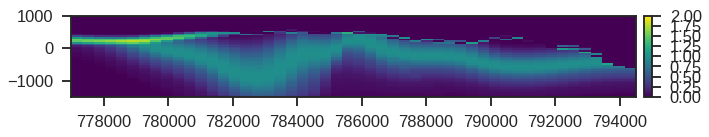

In [52]:
plot_block(mesh_1A_ie)

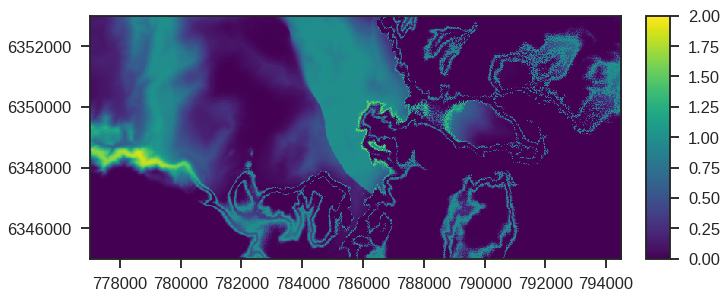

In [53]:
plot_map(map_1B_ie)

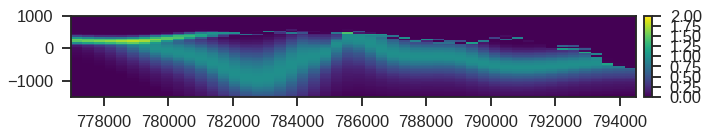

In [54]:
plot_block(mesh_1B_ie)

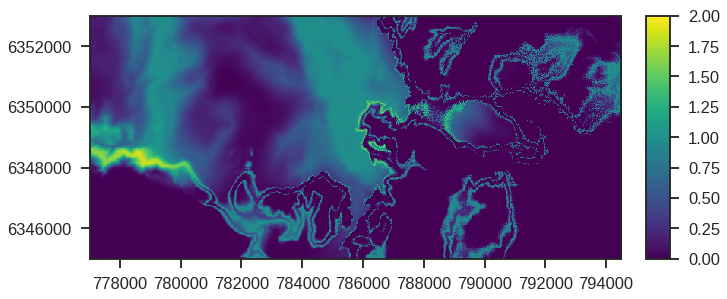

In [55]:
plot_map(map_1C_ie)

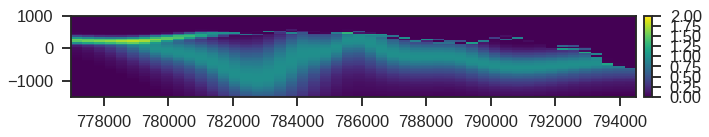

In [56]:
plot_block(mesh_1C_ie)

In [51]:
n_iter =i

### Save resulting probability/entropy fields

In [52]:
faultsmap,faultsmesh
lithmap, lithmesh 
allmap, allmesh

(array([[0.    , 0.    , 0.    , ..., 1.    , 1.    , 1.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.1841, 0.1844, 0.1866, ..., 0.    , 0.    , 0.    ],
        [0.8159, 0.8156, 0.8134, ..., 0.    , 0.    , 0.    ]]),
 array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
         1.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 3.000e-04, 3.000e-04, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.000e+00, 9.997e-01, 9.997e-01, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]))

In [53]:
path_faultsmap = '/home/elisa/elisa/results/faultsmap_'+str(model_num)+param+'_n'+str(n_iter)
path_faultsmesh = '/home/elisa/elisa/results/faultsmesh_'+str(model_num)+param+'_n'+str(n_iter)

path_lithmap = '/home/elisa/elisa/results/lithmap_'+str(model_num)+param+'_n'+str(n_iter)
path_lithmesh = '/home/elisa/elisa/results/lithmesh_'+str(model_num)+param+'_n'+str(n_iter)

path_allmap = '/home/elisa/elisa/results/allmap_'+str(model_num)+param+'_n'+str(n_iter)
path_allmesh = '/home/elisa/elisa/results/allmesh_'+str(model_num)+param+'_n'+str(n_iter)

In [54]:
np.save(path_faultsmap, faultsmap)
np.save(path_faultsmesh, faultsmesh)

np.save(path_lithmap, lithmap)
np.save(path_lithmesh, lithmesh)

np.save(path_allmap, allmap)
np.save(path_allmesh, allmesh)

In [68]:
path_faultsmap

'/home/elisa/elisa/results/faultsmap_6b_n3000'

In [ ]:
np.save('/home/elisa/elisa/resultsfaultsmap'+str(model_num)+param+'_n'+str(n_iter)')

In [61]:
spath_map_prob_field = '/home/elisa/elisa/map_prob_model'+str(model_num)+param+'_n'+str(n_iter)
spath_model_prob_field = '/home/elisa/elisa/model_prob_model'+str(model_num)+param+'_n'+str(n_iter)
spath_map_ie = '/home/elisa/elisa/map_ie_model'+str(model_num)+param+'_n'+str(n_iter)
spath_model_ie = '/home/elisa/elisa/model_ie_model'+str(model_num)+param+'_n'+str(n_iter)

In [62]:
spath_map_prob_field

'/home/elisa/elisa/map_prob_model6b_n3000'

In [ ]:
np.save(spath_map_prob_field,prob_map)
np.save(spath_model_prob_field,prob_mesh)
np.save(spath_map_ie,ie_map)
np.save(spath_model_ie,ie_mesh)

In [17]:
def extract_countours(interp_data, fb,lb=None):   
    lith_colors = ['#000000','#000000','#000000','#000000','#000000']
    cm = matplotlib.colors.LinearSegmentedColormap.from_list('lith_colors', lith_colors, N=5)
    
    n_faults = int(fb.shape[0]/2)
    level = []
    block_id=[]
    
    all_levels = interp_data.potential_at_interfaces[np.where(interp_data.potential_at_interfaces != 0)]
    
    for i in range(fb.shape[0]):
        if i%2:
            block_id.append(i)
    
    for i in range(len(block_id)):
        cp = plt.contour(np.flip(fb[block_id[i]].reshape(320, 700),axis=0),0,
            extent=geo_data.extent[[0,1,2,3]],levels=all_levels[i], cmap=cm)
    if lb is not None:
        cp2 = plt.contour(np.flip(lb[block_id[i]].reshape(320, 700),axis=0),0,
                extent=geo_data.extent[[0,1,2,3]],levels=np.sort(all_levels[len(block_id):]),cmap=cm)

#print(all_levels) 
    

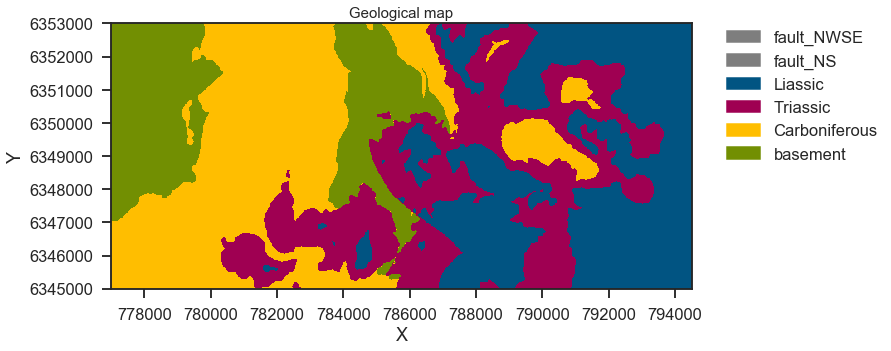

In [97]:
gp.plotting.plot_map(geo_data, geomap=np.flip(lith_map[0].reshape(320, 700),axis=0))
#extract_countours(interp_data,fault_map)
plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\map_filtered_b2.png", format='png', dpi=1000)

In [56]:
# only fault uncertainty
if inputdat == 'faults':
    @pymc.deterministic(trace=True)
    def input_data(value=0,geo_data_const=geo_data_const,
                   geo_data_stoch_init = geo_data_stoch_init, orient_modifier = orient_modifier):

        geo_data_stoch = gp.get_data(geo_data_stoch_init, numeric=True)
        #print(geo_data_stoch.shape)
        geo_data_stoch_orient = geo_data_stoch_init.orientations[["X", "Y", "Z","G_x", "G_y", "G_z","formation",'kappa',
                                               'dip', 'azimuth', 'polarity','isFault']]

        fault_df = geo_data_stoch_orient[geo_data_stoch_orient['isFault'] == True]
        means = geo_data_const.orientations[geo_data_const.orientations['isFault'] == True][['G_x','G_y','G_z']]
        notfault_df = geo_data_stoch_orient[geo_data_stoch_orient['isFault'] == False]

        for i in fault_df.index:
           
            mean = means.loc[i]
            form = geo_data_stoch_orient.loc[i]['formation']
            kappa = geo_data_stoch_orient.loc[i]['kappa']

            fish = vMF(mean = mean, kappa = kappa)
            #print(fish.mean)
            xyz, azdip = fish.sample(direct_output=True,num_samples=n_iter)

            fault_df.loc[i, ['G_x','G_y','G_z']] = xyz[int(orient_modifier)]
            fault_df.loc[i, ['azimuth','dip']] = azdip[int(orient_modifier)]

        geo_orientations = pn.concat((fault_df,notfault_df))
        geo_orient = geo_orientations[["X", "Y", "Z","G_x", "G_y", "G_z", 'dip', 'azimuth', 'polarity']]
        #print(geo_orientations)
        return [geo_data_stoch.xs('interfaces')[["X", "Y", "Z"]].values, geo_orient]
    
    
elif inputdat == 'all':
        # all uncertainty values of df
    @pymc.deterministic(trace=True)
    def input_data(value=0,geo_data_const=geo_data_const,
                   geo_data_stoch_init = geo_data_stoch_init, orient_modifier = orient_modifier):

        geo_data_stoch = gp.get_data(geo_data_stoch_init, numeric=True)
        #print(geo_data_stoch.shape)
        geo_data_stoch_orient = geo_data_stoch_init.orientations[["X", "Y", "Z","G_x", "G_y", "G_z","formation",'kappa',
                                               'dip', 'azimuth', 'polarity','isFault']]
        
        means = geo_data_const.orientations[['G_x','G_y','G_z']]
        #fault_df = geo_data_stoch_orient[geo_data_stoch_orient['isFault'] == True]
        #notfault_df = geo_data_stoch_orient[geo_data_stoch_orient['isFault'] == False]
        
        for i in geo_data_stoch_orient.index:

            mean = means.loc[i]
            form = geo_data_stoch_orient.loc[i]['formation']
            kappa = geo_data_stoch_orient.loc[i]['kappa']

            fish = vMF(mean = mean, kappa = kappa)
            #print(fish.mean)
            xyz, azdip = fish.sample(direct_output=True,num_samples=n_iter)

            geo_data_stoch_orient.loc[i, ['G_x','G_y','G_z']] = xyz[int(orient_modifier)]
            geo_data_stoch_orient.loc[i, ['azimuth','dip']] = azdip[int(orient_modifier)]

        #geo_orientations = pn.concat((fault_df,notfault_df))
        geo_orient = geo_data_stoch_orient[["X", "Y", "Z", "G_x", "G_y", "G_z", 'dip', 'azimuth', 'polarity']]
        #print(geo_orientations)
        return [geo_data_stoch.xs('interfaces')[["X", "Y", "Z"]].values, geo_orient]

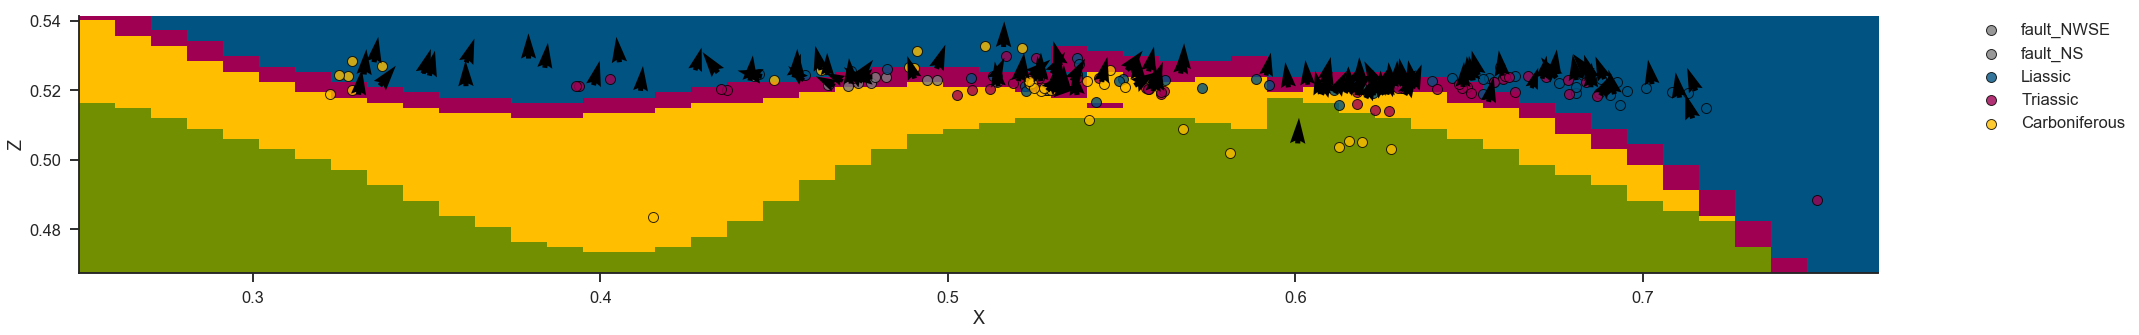

In [57]:
@pymc.deterministic(trace=False)
def gempy_model(value=0,
                input_data=input_data, verbose=True):
    
    # modify input data values accordingly
    interp_data.geo_data_res.interfaces[["X", "Y", "Z"]] = input_data[0]

    interp_data.geo_data_res.orientations[["X", "Y", "Z","G_x", "G_y", "G_z", 
                                           'dip', 'azimuth', 'polarity']] = input_data[1] 

    try:
        # try to compute model
        lb, fb = gp.compute_model(interp_data)
        #print(lb)
        if True:
            gp.plot_section(interp_data.geo_data_res, lb[0], 0, direction = 'y',plot_data=True)
            #print(interp_data.geo_data_res.interfaces["X"]) 
            
            return lb,fb

    
    except np.linalg.linalg.LinAlgError as err:
        # if it fails (e.g. some input data combinations could lead to 
        # a singular matrix and thus break the chain) return an empty model
        # with same dimensions (just zeros)
        if verbose:
            print("Exception occured.")
            return np.zeros_like(lith_block), np.zeros_like(fault_block)

In [58]:
params = [input_data, gempy_model,orient_modifier] 
model = pymc.Model(params)

In [59]:
dbname = "C:\\Users\\elisa\\Documents\\git\\elthesis\\notebooks\\databases\\final\\Model3_filt_1102_i"+str(n_iter)+".hdf5"

In [60]:
dbname

'C:\\Users\\elisa\\Documents\\git\\elthesis\\notebooks\\databases\\final\\Model3_filt_1102_i30.hdf5'

In [61]:
RUN = pymc.MCMC(model, db="hdf5",dbname = dbname)

In [62]:
RUN.sample(iter=n_iter, verbose=0)

 [--                6%                  ] 2 of 30 complete in 2.3 sec[---              10%                  ] 3 of 30 complete in 4.6 sec[-----            13%                  ] 4 of 30 complete in 6.8 sec[------           16%                  ] 5 of 30 complete in 9.0 sec[-------          20%                  ] 6 of 30 complete in 11.1 sec[--------         23%                  ] 7 of 30 complete in 13.3 sec[----------       26%                  ] 8 of 30 complete in 15.5 sec[-----------      30%                  ] 9 of 30 complete in 17.7 sec[------------     33%                  ] 10 of 30 complete in 20.1 sec[-------------    36%                  ] 11 of 30 complete in 22.3 sec[---------------  40%                  ] 12 of 30 complete in 24.5 sec[---------------- 43%                  ] 13 of 30 complete in 26.6 sec[-----------------46%                  ] 14 of 30 complete in 28.9 sec[-----------------50%                  ] 15 of 30 complete in 31.1 sec[-----------------53%          

### Posterior

In [63]:
import importlib
importlib.reload(gp.posterior_analysis_elisa )

<module 'gempy.posterior_analysis_elisa' from 'C:\\Users\\elisa\\Documents\\git\\gempy\\gempy\\posterior_analysis_elisa.py'>

In [64]:
from gempy.posterior_analysis_elisa import Posterior

In [65]:
post = Posterior(dbname,entropy=True,interpdata=interp_data,geodata=geo_data, topography=elevation)

Lithology probability for all post models are calculated. Based on the model complexity and the number of iterations, this could take a while


In [74]:
norm = matplotlib.colors.Normalize(post.map_ie.min(),post.map_ie.max())

In [73]:
post.map_ie.max(),post.map_ie.min()

(1.7539845481434939, 0.0)

In [93]:
iemap=np.flip(post.map_ie.reshape(320, 700),axis=0)
iemap2=post.map_ie.reshape(320, 700)

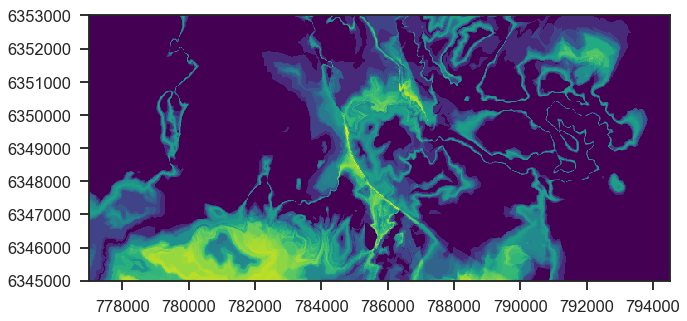

In [99]:
plt.imshow(iemap2,cmap='viridis',extent=geo_data.extent[:4])
plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\map_entropyflip2.png", format='png', dpi=1000)

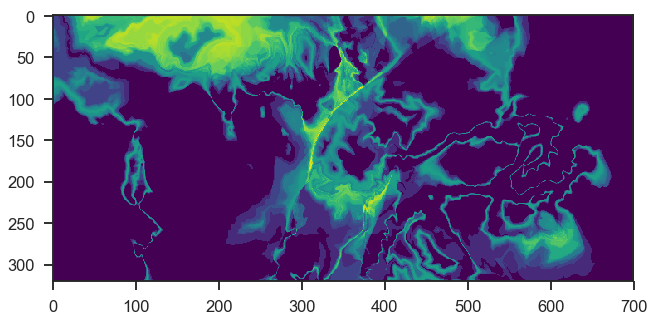

In [86]:
#gp.plotting.plot_data(geo_data,direction='z')
plt.imshow(iemap,cmap='viridis')
#plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\map_entropy.png", format='png', dpi=1000)

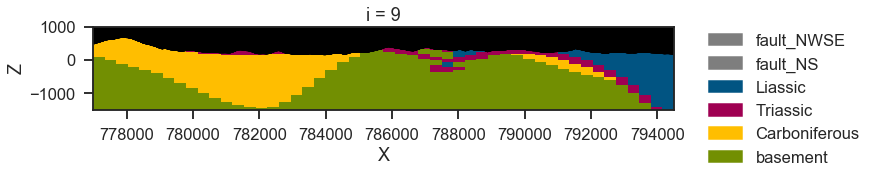

In [92]:
for i in range(0,10):
    post.plot_section(iteration=i,block='lith',fault=False)
    plt.title("i = %.d"%i)
    plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\post_y25_nofault"+str(i))

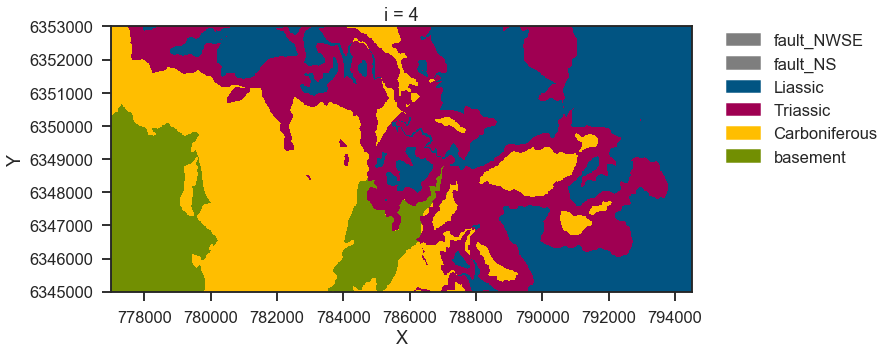

In [101]:
for i in range(0,5):
    post.plot_map(i)
    plt.title("i = %.d"%i)
    plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\post_map"+str(i))


In [66]:
post.plot_section_ie(block='lith',direction='y',cell_number=25,plot_data=True, plot_all_data=False)

AttributeError: 'Posterior' object has no attribute 'lb_ie'

KeyboardInterrupt: 

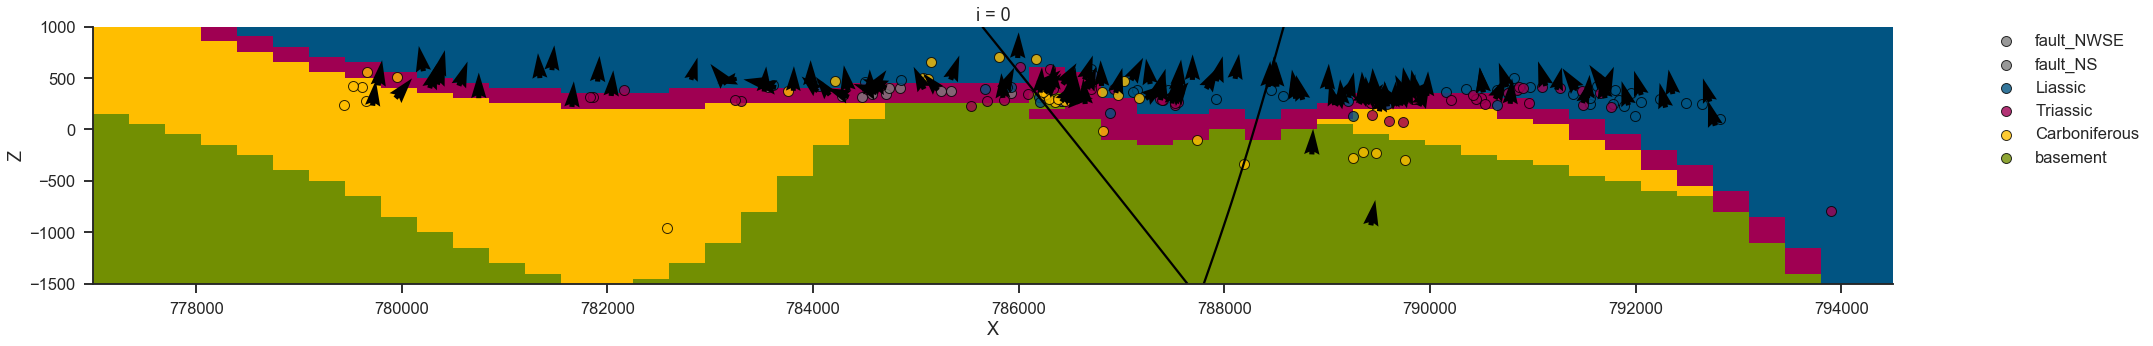

In [67]:
for i in range(0,2):
    post.plot_section(iteration=i,block='lith',fault=True,plot_data=True)
    plt.title("i = %.d"%i)
    #plt.savefig("C:\\Users\\elisa\\Documents\\git\\elthesis\\fig_export2\\entropy_orient"+str(i))

In [ ]:
post = Posterior(dbname,entropy=True,interpdata=interp_data,geodata=geo_data)

#### Topography

In [9]:
#topography
path_dtm='C:\\Users\\elisa\\Documents\\Ales\\DISTRIB_2018\\MNT\\MNT_Dx25m_ALES_L93.asc'
folder= "C:\\Users\\elisa\\Documents\\git\\MSc\\GempyTopography\\unwichtig"
xyz_path = "C:\\Users\\elisa\\Documents\\git\\MSc\\GempyTopography\\XYZ.csv"

In [10]:
from gempy.utils import topography

In [11]:
elevation = topography.DEM(path_dtm, geo_data,output_path = folder)

Extents of geo_data and DEM do not match. DEM is cropped and stored as C:\Users\elisa\Documents\git\MSc\GempyTopography\unwichtig_cropped_DEM.tif


Raster extent: [ 777000  794500 6345000 6353000     138     730] 
Raster resolution: [320 700]


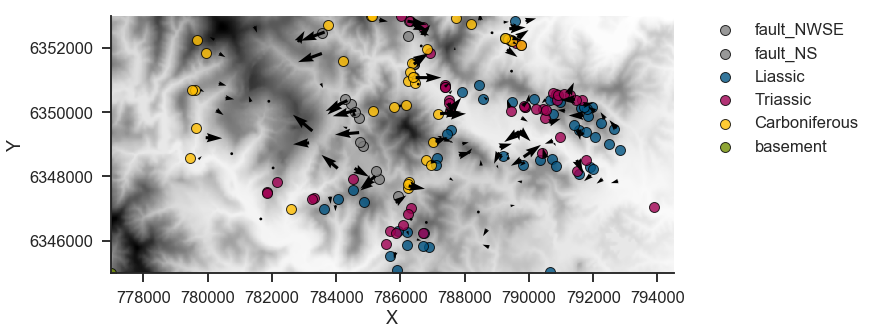

In [12]:
elevation.show(plot_data=True)

In [10]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True,
                                  dtype='float64',theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2


In [11]:
lith_block, fault_block = gp.compute_model(interp_data)

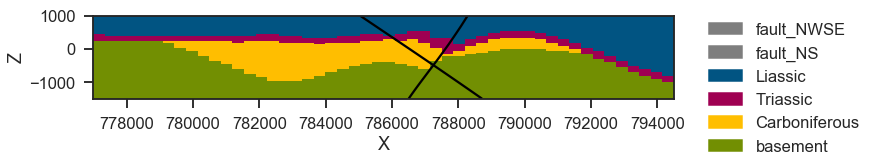

In [12]:
gp.plot_section(geo_data, lith_block[0], cell_number=5,  direction='y')#, topography=elevation)
gp.plotting.extract_countours(geo_data,interp_data,fb=fault_block,cell_number=5,direction='y')

In [ ]:
lith_map, fault_map = gp.compute_model_at(elevation.surface_coordinates[0], interp_data)

In [ ]:
lith_map[0].reshape(324, 588)

In [ ]:
gp.plotting.plot_map(geo_data, geomap=np.flip(lith_map[0].reshape(324, 588),axis=0),plot_data=True)
gp.plotting.extract_countours(geo_data,interp_data, fb=fault_map, lb=lith_map)

In [99]:
geo_data.resolution

array([30, 30, 30])

In [21]:
ver , sim = gp.get_surfaces(interp_data,lith_block[1],(fault_block[1], fault_block[3], fault_block[5]))

In [22]:
gp.plotting.plot_surfaces_3D(geo_data, ver, sim, plot_data=False)

closing vtk
